In [1]:
%%time
import malaya

CPU times: user 12.3 s, sys: 1.66 s, total: 14 s
Wall time: 18.9 s


In [2]:
%matplotlib inline

import pandas as pd
df = pd.read_csv('tests/02032018.csv',sep=';')
df = df.iloc[3:,1:]
df.columns = ['text','label']
corpus = df.text.tolist()

## Generate scatter plot for unsupervised clustering

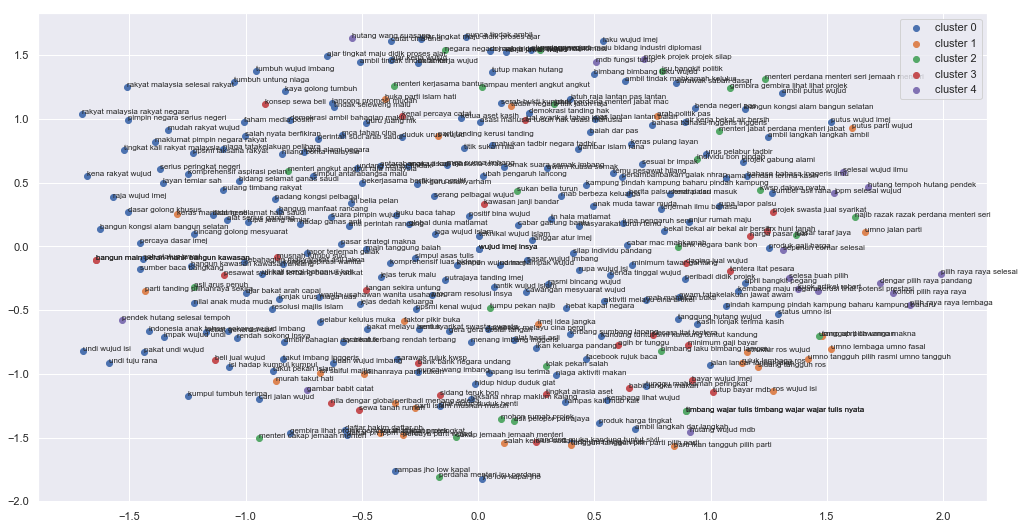

In [3]:
result_scatter = malaya.cluster.cluster_scatter(corpus,vectorizer='tfidf')

## Generate dendogram plot for unsupervised clustering

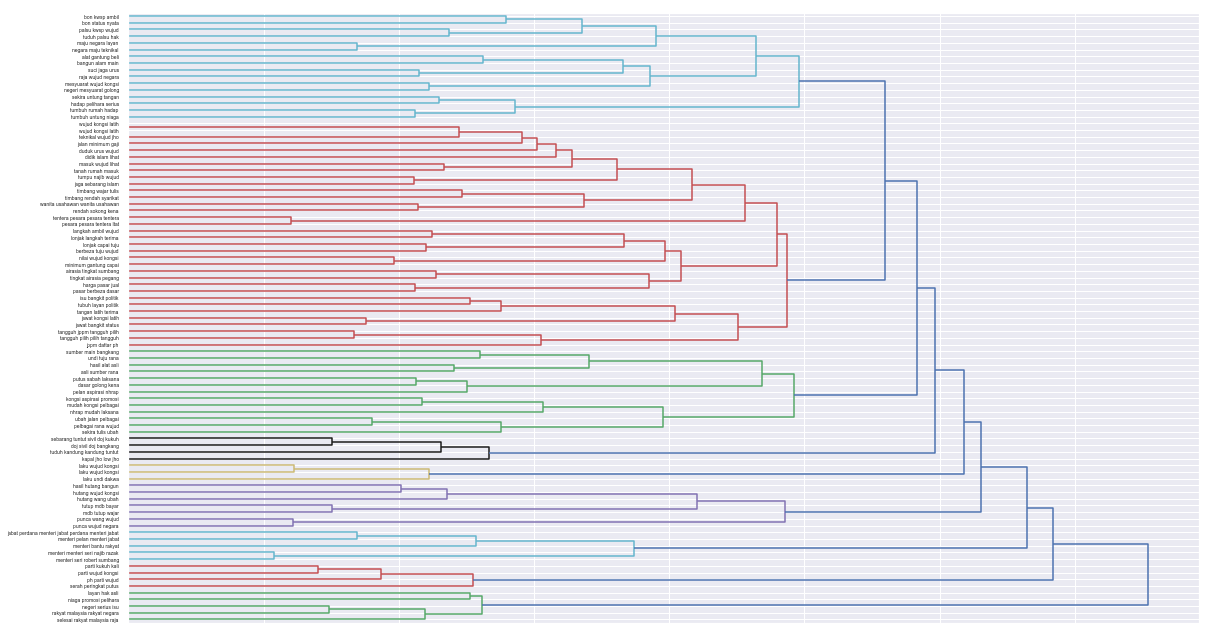

In [4]:
result_scatter = malaya.cluster.cluster_dendogram(corpus,vectorizer='tfidf')

## Generate undirected graph for unsupervised clustering

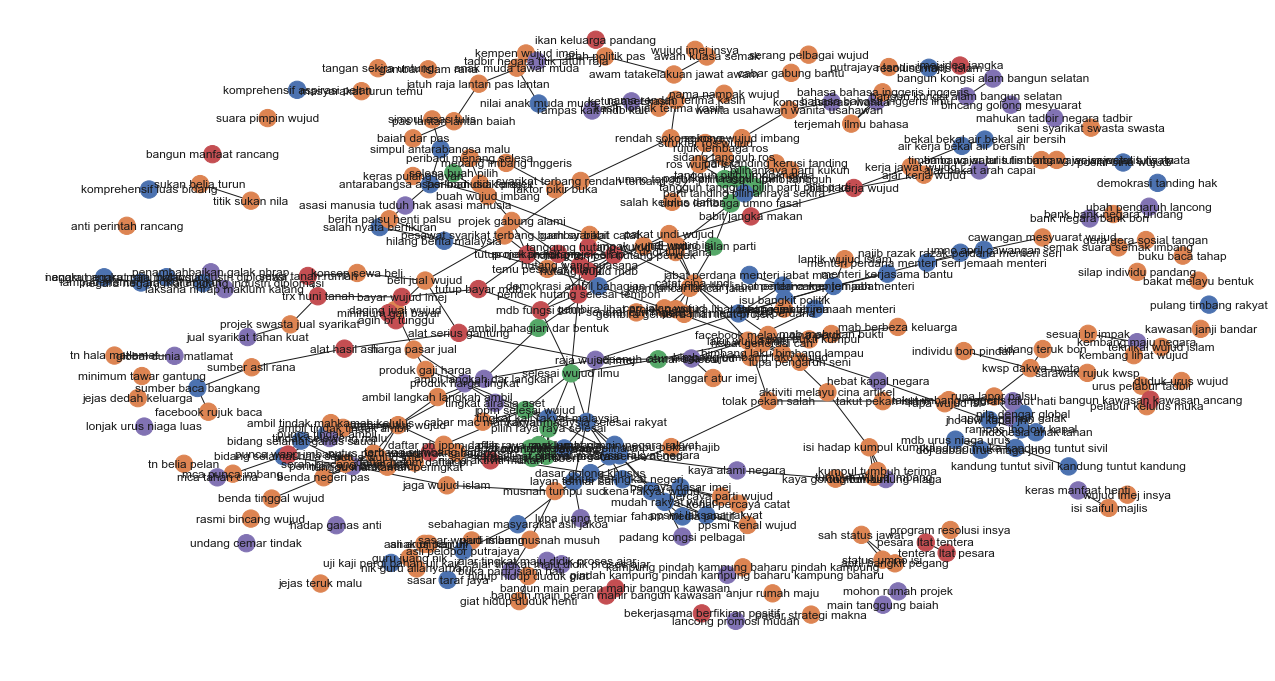

In [5]:
result_scatter = malaya.cluster.cluster_graph(corpus,vectorizer='tfidf')

## Generate undirected graph for Entities and topics relationship

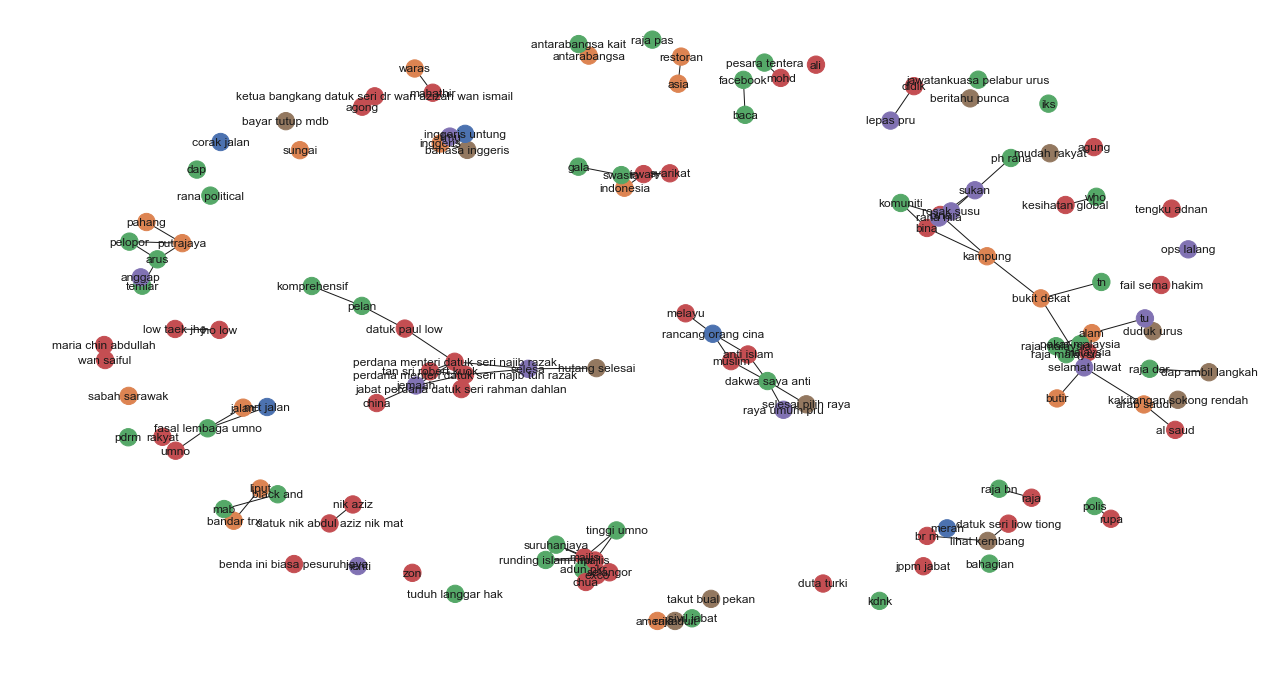

In [6]:
entity_model = malaya.entity.deep_model('luong')
topic_model = malaya.topic_model.lda
result_linking = malaya.cluster.cluster_entity_linking(corpus,
                                                       entity_model,
                                                       topic_model,
                                                       vectorizer='tfidf')

## Cluster same word structure based on POS and Entities

In [7]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

In [8]:
bahdanau_entities = malaya.entity.deep_model('bahdanau')
bahdanau_pos = malaya.pos.deep_model('bahdanau')

In [9]:
result_entities = bahdanau_entities.predict(string)
result_pos = bahdanau_pos.predict(string)

In [10]:
generated_grams = malaya.generator.pos_entities_ngram(
    result_pos,
    result_entities,
    ngram = (1, 3),
    accept_pos = ['NOUN', 'PROPN', 'VERB'],
    accept_entities = ['law', 'location', 'organization', 'person', 'time'],
)
generated_grams

['Lumpur Sempena',
 'sambutan Aidilfitri',
 'terbitan Jabatan',
 'depan Perdana Menteri',
 'Menteri Pengangkutan Anthony',
 'Mohamad Menteri',
 'sekiranya mengantuk',
 'Mahathir Mohamad',
 'Lumpur Sempena sambutan',
 'pesanan',
 'Jalan',
 'Mohamad Menteri Pengangkutan',
 'Mahathir menasihati berhenti',
 'Kuala Lumpur Sempena',
 'Tun Dr',
 'Mahathir Mohamad Menteri',
 'pesanan orang mahu',
 'Sempena sambutan',
 'pulang kampung',
 'masing-masing video',
 'orang mahu pulang',
 'Raya',
 'memandu',
 'Perdana',
 'kampung halaman masing-masing',
 'Jabatan Keselamatan',
 'Perdana Menteri Tun',
 'video terbitan Jabatan',
 'Siew',
 'Kuala',
 'terbitan Jabatan Keselamatan',
 'Keselamatan Jalan',
 'Fook menitipkan pesanan',
 'Dr',
 'tidur sekiranya',
 'Mohamad',
 'depan Perdana',
 'Menteri Tun',
 'Sempena',
 'menasihati berhenti berehat',
 'Raya Jkjr Dr',
 'Jabatan',
 'Anthony Loke',
 'tidur',
 'Jkjr',
 'berehat',
 'Pengangkutan Anthony Loke',
 'Jalan Raya',
 'Lumpur',
 'Perdana Menteri',
 'Jkjr D

In [11]:
malaya.cluster.cluster_words(generated_grams)

['mahu pulang kampung',
 'Fook menitipkan pesanan',
 'berhenti berehat tidur',
 'minggu depan Perdana',
 'masing-masing video terbitan',
 'depan Perdana Menteri',
 'Menteri Pengangkutan Anthony',
 'Siew Fook menitipkan',
 'menasihati berhenti berehat',
 'Raya Jkjr Dr',
 'sambutan Aidilfitri minggu',
 'Pengangkutan Anthony Loke',
 'Lumpur Sempena sambutan',
 'pulang kampung halaman',
 'Mahathir menasihati berhenti',
 'Mohamad Menteri Pengangkutan',
 'tidur sekiranya mengantuk',
 'Kuala Lumpur Sempena',
 'Mahathir Mohamad Menteri',
 'Tun Dr Mahathir',
 'pesanan orang mahu',
 'Jalan Raya Jkjr',
 'Anthony Loke Siew',
 'Dr Mahathir Mohamad',
 'Sempena sambutan Aidilfitri',
 'orang mahu pulang',
 'halaman masing-masing video',
 'Jabatan Keselamatan Jalan',
 'Keselamatan Jalan Raya',
 'Jkjr Dr Mahathir',
 'Dr Mahathir menasihati',
 'berehat tidur sekiranya',
 'Menteri Tun Dr',
 'kampung halaman masing-masing',
 'Perdana Menteri Tun',
 'menitipkan pesanan orang',
 'video terbitan Jabatan',
 'L

## Cluster Part-Of-Speech

In [12]:
malaya.cluster.cluster_pos(result_pos)

{'ADJ': ['depan', 'khas', 'ramai', 'pendek'],
 'ADP': ['kepada', 'ke', 'Dalam'],
 'ADV': ['sebentar'],
 'ADX': [],
 'AUX': [],
 'CCONJ': ['dan'],
 'DET': ['itu'],
 'NOUN': ['sambutan',
  'pesanan',
  'orang',
  'kampung halaman masing-masing',
  'video',
  'terbitan Jabatan Keselamatan',
  'Jkjr',
  'berehat',
  'tidur',
  'sekiranya mengantuk'],
 'NUM': [],
 'PART': [],
 'PRON': ['yang', 'mereka'],
 'PROPN': ['Kuala Lumpur Sempena',
  'Aidilfitri',
  'Perdana Menteri Tun Dr Mahathir Mohamad',
  'Menteri Pengangkutan Anthony Loke Siew Fook',
  'Jalan Raya',
  'Dr Mahathir'],
 'SCONJ': ['supaya', 'ketika'],
 'SYM': [],
 'VERB': ['minggu', 'menitipkan', 'mahu pulang', 'menasihati', 'berhenti'],
 'X': []}

In [13]:
malaya.cluster.cluster_entities(result_entities)

{'OTHER': ['sempena',
  'dan',
  'menitipkan pesanan khas kepada',
  'ramai yang mahu pulang ke kampung halaman masing-masing dalam video pendek terbitan',
  'itu'],
 'law': ['orang'],
 'location': ['kuala lumpur'],
 'organization': ['menteri pengangkutan', 'jabatan keselamatan jalan raya'],
 'person': ['perdana menteri tun dr mahathir mohamad',
  'anthony loke siew fook',
  'jkjr',
  'dr mahathir'],
 'quantity': [],
 'time': ['minggu depan'],
 'event': ['sambutan aidilfitri']}